<a href="https://colab.research.google.com/github/mkodk/LectDM/blob/main/discrete_math_TEAM11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tempfile import tempdir
# 1.graph 구조를 팀원과 팀원 친구의 이름으로 바꿔서 실습

from collections import deque

team11_graph = {
    "이창훈" : ["이하진","이재면","조몽주","경범준"],
    "이하진" : ["이창훈","이재면"],
    "이재면" : ["이창훈","이하진"],
    "조몽주" : ["이창훈","경범준"],
    "경범준" : ["이창훈","조몽주"]

}

#DFS 함수 정의
def dfs(graph,v,visited):
  visited.add(v)
  print(v,end='=>')
  for neighbor in graph[v]:
    if neighbor not in visited:
      dfs(graph,neighbor,visited)

print("DFS 탐색 순서")
dfs(team11_graph,"이창훈",set())

#BFS 함수 정의
def bfs(graph,start):
  visited = set()
  queue = deque([start])
  visited.add(start)

  while queue:
    v = queue.popleft()
    print(v,end='=>')
    for neighbor in graph[v]:
      if neighbor not in visited:
        visited.add(neighbor)
        queue.append(neighbor)
print("\n")
print("BFS 탐색 순서")
bfs(team11_graph,"이창훈")


DFS 탐색 순서
이창훈=>이하진=>이재면=>조몽주=>경범준=>

BFS 탐색 순서
이창훈=>이하진=>이재면=>조몽주=>경범준=>

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque


team11_graph = {
    "이창훈" : ["이하진","이재면","조몽주","경범준"],
    "이하진" : ["이창훈","이재면"],
    "이재면" : ["이창훈","이하진"],
    "조몽주" : ["이창훈","경범준"],
    "경범준" : ["이창훈","조몽주"]
}

#prompt networkx로 dfs와 bfs를 시각화 하고 싶어

# NetworkX 그래프 생성 (딕셔너리를 사용하여 방향 없는 그래프 생성)
G = nx.Graph(team11_graph)

# 그래프 레이아웃 미리 계산 (노드 위치 고정)
pos = nx.spring_layout(G, seed=42)

# 모든 노드 이름 목록
all_nodes = list(G.nodes())
node_map = {node: i for i, node in enumerate(all_nodes)}


DFS 시각화


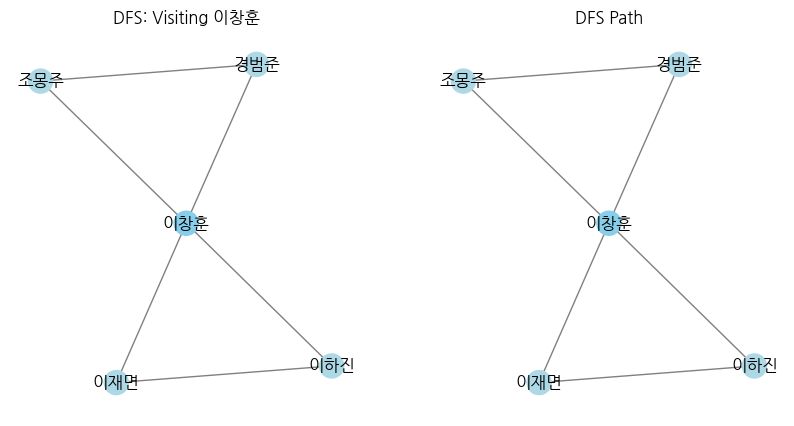

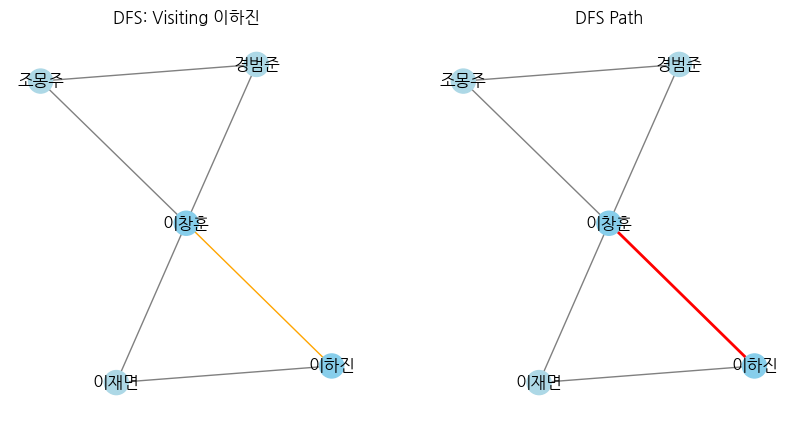

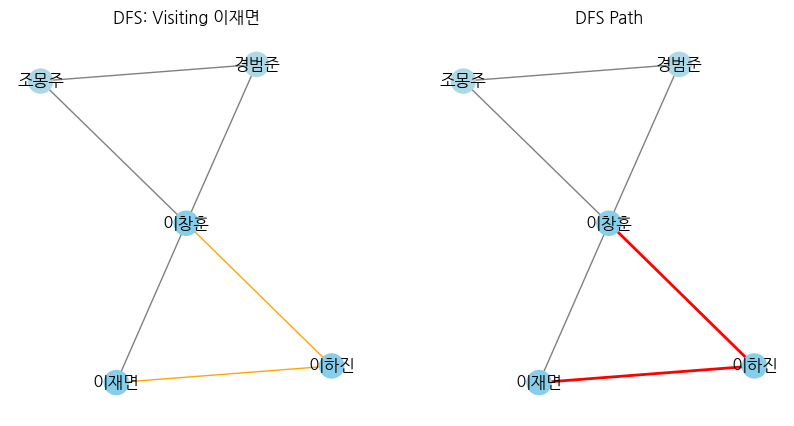

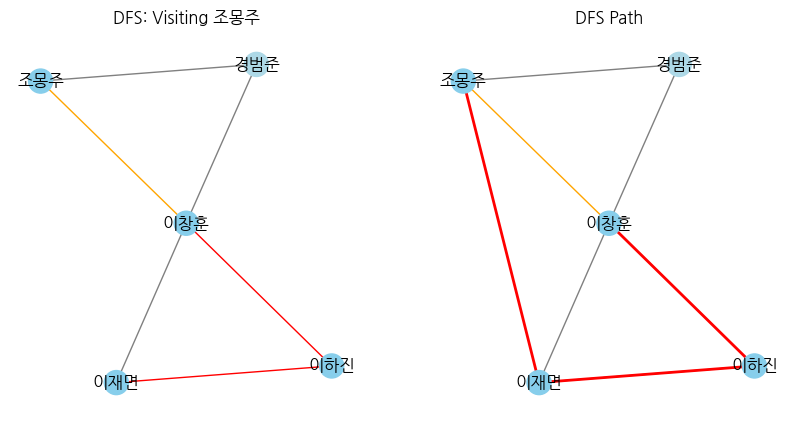

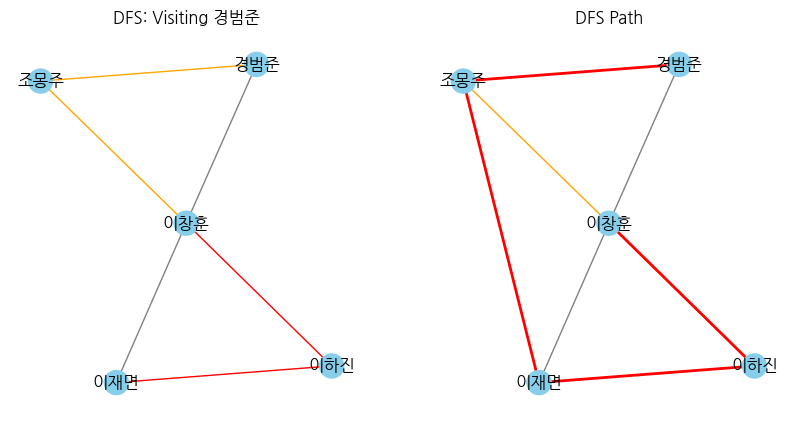

In [29]:
# DFS 시각화 함수
def visualize_dfs(graph, start_node, pos):
    visited = set()
    path = []
    edge_colors = {}

    def dfs_recursive(node):
        visited.add(node)
        path.append(node)

        # 현재 노드 색상 변경
        node_colors = ['skyblue' if n in visited else 'lightblue' for n in graph.nodes()]
        edge_colors_list = [edge_colors.get(tuple(sorted(e)), 'gray') for e in graph.edges()]

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
        plt.title(f"DFS: Visiting {node}")

        plt.subplot(1, 2, 2)
        nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
        plt.title("DFS Path")
        # 현재까지의 경로를 굵게 표시
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2.0)


        plt.show()

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                # 간선 색상 변경
                edge_colors[tuple(sorted((node, neighbor)))] = 'orange' # 탐색 중인 간선
                dfs_recursive(neighbor)
                edge_colors[tuple(sorted((node, neighbor)))] = 'red' # 탐색 완료 간선


    dfs_recursive(start_node)

# DFS 시각화 실행
print("DFS 시각화")
visualize_dfs(G, "이창훈", pos)


BFS 시각화


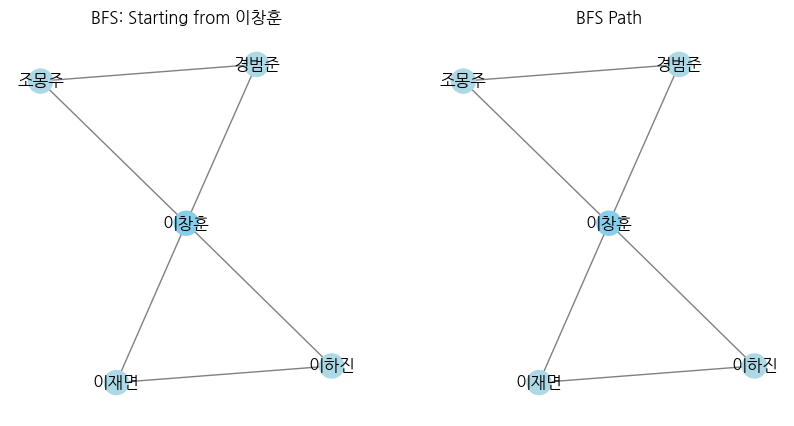

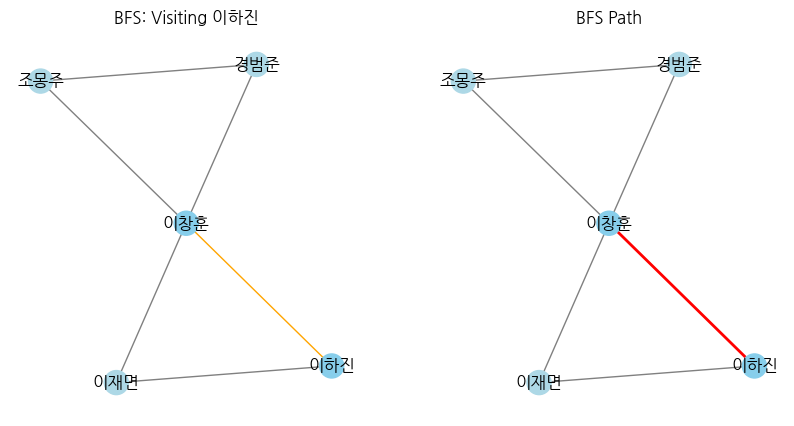

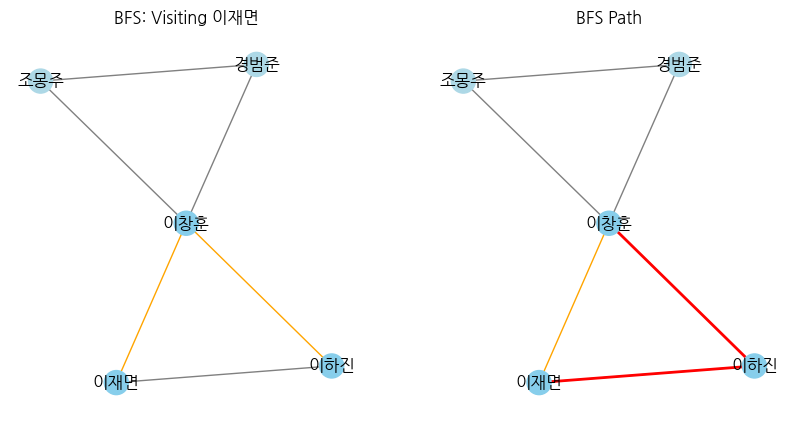

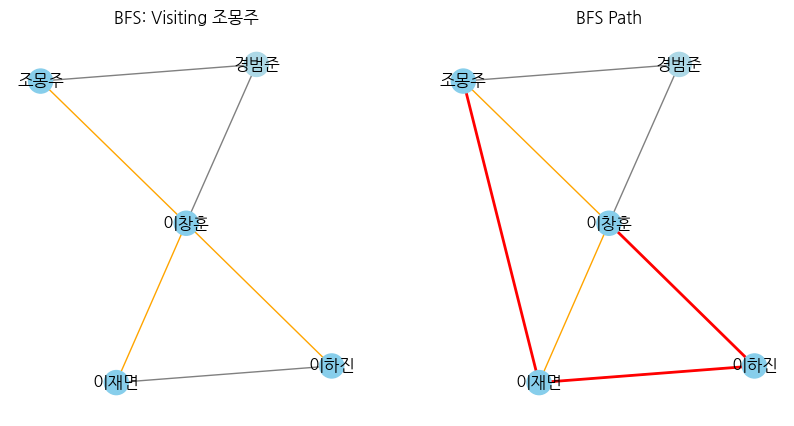

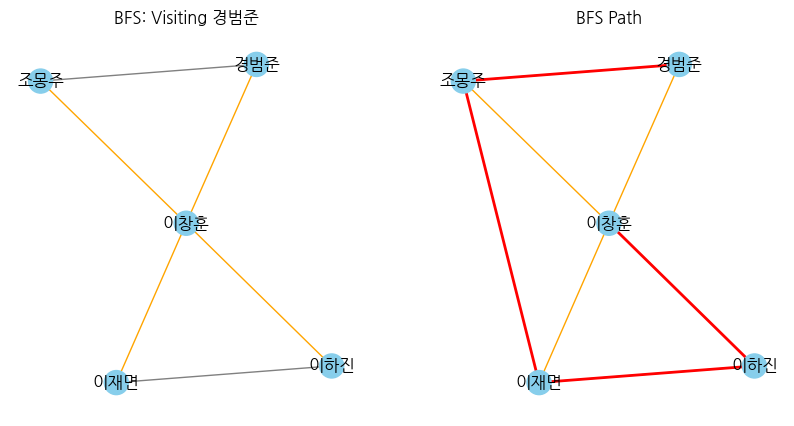

In [31]:
# BFS 시각화 함수
def visualize_bfs(graph, start_node, pos):
    visited = set()
    queue = deque([start_node])
    visited.add(start_node)
    path = [start_node]
    edge_colors = {}

    # 초기 그래프 시각화
    node_colors = ['skyblue' if n in visited else 'lightblue' for n in graph.nodes()]
    edge_colors_list = [edge_colors.get(tuple(sorted(e)), 'gray') for e in graph.edges()]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
    plt.title(f"BFS: Starting from {start_node}")

    plt.subplot(1, 2, 2)
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
    plt.title("BFS Path")
    plt.show()


    while queue:
        v = queue.popleft()

        for neighbor in graph.neighbors(v):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                path.append(neighbor)
                # 간선 색상 변경
                edge_colors[tuple(sorted((v, neighbor)))] = 'orange' # 탐색 완료 간선


                # 현재 상태 시각화
                node_colors = ['skyblue' if n in visited else 'lightblue' for n in graph.nodes()]
                edge_colors_list = [edge_colors.get(tuple(sorted(e)), 'gray') for e in graph.edges()]

                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
                plt.title(f"BFS: Visiting {neighbor}")

                plt.subplot(1, 2, 2)
                nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
                plt.title("BFS Path")
                # 현재까지의 경로를 굵게 표시
                path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
                nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2.0)
                plt.show()


# BFS 시각화 실행
print("\nBFS 시각화")
visualize_bfs(G, "이창훈", pos)

In [ ]:
"""
prompt
이제 위에 것 과 유사하게 감염 시뮬레이터를 만들거야. 2단계 이내의 전염 경로를 추적,
그래프는 인접 리스트 형태로 구성해야 해. 감염자는 1명이고, 이름으로 지정해야 해.
2단계 이내로 연결된 노드들을 출력해, 단 감염자 자신은 제외.
출력 형식은 자유지만 감염 경로의 거리(레벨)은 함께 표시해줘 노드 개수는 1000개 내외, max depth 50으로 부탁해
"""


In [54]:
import random
import networkx as nx # NetworkX 라이브러리 임포트

# 노드 개수 및 대략적인 최대 깊이 정의
num_nodes = 1000
max_depth = 50

# 더 쉬운 깊이 제어를 위해 방향 그래프 생성
G_large = nx.DiGraph()

# 노드 이름 추가
nodes = [f'Node_{i}' for i in range(num_nodes)]
G_large.add_nodes_from(nodes)

# 깊이를 제어하기 위해 느슨하게 트리 구조와 유사하게 생성
# 루트 노드에서 시작하여 레이어를 생성하기 위해 엣지 추가
root = nodes[0]

# 각 레벨의 노드 추적
level_nodes = {0: [root]}
all_added_nodes = {root}

# 레벨별로 그래프 구축
for level in range(max_depth):
    level_nodes[level + 1] = []
    current_level_nodes = level_nodes[level]

    if not current_level_nodes:
        break

    for u in current_level_nodes:
        # 추가할 자식 노드 수 결정 (랜덤)
        num_children = random.randint(1, int(num_nodes / max_depth) * 2) # 원하는 밀도를 위해 승수 조정

        added_children_count = 0
        while added_children_count < num_children and len(all_added_nodes) < num_nodes:
            # 아직 추가되지 않은 노드 중에서 랜덤하게 잠재적 자식 선택
            potential_child = random.choice([n for n in nodes if n not in all_added_nodes])

            # 최대 깊이를 크게 초과하지 않으면 엣지 추가 (휴리스틱)
            # 간단한 방법은 현재 레벨이 합리적인 범위 내에 있을 때만 자식 추가
            if level < max_depth - 1:
                G_large.add_edge(u, potential_child)
                level_nodes[level + 1].append(potential_child)
                all_added_nodes.add(potential_child)
                added_children_count += 1

# 나중에 인접 리스트 표현을 위해 방향 그래프를 무방향 그래프로 변환
# 이는 생성 중 엣지가 한 방향으로만 존재할 수 있는 경우를 처리
G_large_undirected = G_large.to_undirected()


# networkx 그래프를 인접 리스트 딕셔너리로 변환
large_graph_adj_list = {node: list(G_large_undirected.neighbors(node)) for node in G_large_undirected.nodes()}

# 노드 개수 출력 및 몇 가지 엔트리 확인
print(f"생성된 그래프의 노드 수: {len(large_graph_adj_list)} 개.")
print("샘플 인접 리스트 엔트리:")
for i, (node, neighbors) in enumerate(large_graph_adj_list.items()):
    if i < 5:
        print(f"{node}: {neighbors}")
    else:
        break

생성된 그래프의 노드 수: 1000 개.
샘플 인접 리스트 엔트리:
Node_0: ['Node_577', 'Node_601', 'Node_929', 'Node_967', 'Node_468', 'Node_593', 'Node_721', 'Node_618', 'Node_722', 'Node_742', 'Node_734', 'Node_363', 'Node_373', 'Node_325', 'Node_822', 'Node_942', 'Node_724', 'Node_957', 'Node_970', 'Node_377', 'Node_965', 'Node_625', 'Node_237', 'Node_44', 'Node_231', 'Node_303', 'Node_820', 'Node_270', 'Node_869', 'Node_986', 'Node_131', 'Node_122', 'Node_947', 'Node_515', 'Node_638', 'Node_405', 'Node_386']
Node_1: ['Node_724']
Node_2: ['Node_772']
Node_3: ['Node_721']
Node_4: ['Node_827']


In [41]:
# 그래프 키에서 감염자로 지정할 노드 선택
infected_person = random.choice(list(large_graph_adj_list.keys()))

# 감염자의 이름 출력
print(f"감염자는 다음과 같습니다: {infected_person}")

감염자는 다음과 같습니다: Node_376


In [52]:
from collections import deque

# 거리를 저장하기 위한 visited 딕셔너리 초기화
visited = {infected_person: 0}
queue = deque([(infected_person, 0)]) # 큐는 (노드, 거리)를 저장

infected_within_2_steps = {}

while queue:
    current_node, distance = queue.popleft()

    # 거리가 2를 초과하면 중지
    if distance > 2:
        continue

    # 2단계 이내이고 감염자 자신이 아니면 결과에 노드 추가
    if 0 < distance <= 2:
        infected_within_2_steps[current_node] = distance

    # 이웃 탐색
    if current_node in large_graph_adj_list:
        for neighbor in large_graph_adj_list[current_node]:
            if neighbor not in visited:
                visited[neighbor] = distance + 1
                queue.append((neighbor, distance + 1))

# 결과 출력
print("\n2단계 이내 감염된 노드 (감염자 제외):")
for node, dist in infected_within_2_steps.items():
    print(f"- {node} (거리: {dist})")


2단계 이내 감염된 노드 (감염자 제외):
- Node_423 (거리: 1)
- Node_0 (거리: 2)
- Node_128 (거리: 2)
- Node_987 (거리: 2)
- Node_876 (거리: 2)
- Node_468 (거리: 2)
- Node_385 (거리: 2)
- Node_530 (거리: 2)
- Node_311 (거리: 2)
- Node_429 (거리: 2)
- Node_686 (거리: 2)
- Node_850 (거리: 2)
- Node_362 (거리: 2)
- Node_227 (거리: 2)
- Node_559 (거리: 2)
- Node_764 (거리: 2)
- Node_108 (거리: 2)
- Node_506 (거리: 2)
- Node_837 (거리: 2)
- Node_630 (거리: 2)
- Node_86 (거리: 2)
- Node_660 (거리: 2)
- Node_741 (거리: 2)
- Node_601 (거리: 2)
- Node_60 (거리: 2)
- Node_942 (거리: 2)
- Node_935 (거리: 2)
- Node_564 (거리: 2)
- Node_347 (거리: 2)
- Node_742 (거리: 2)
- Node_87 (거리: 2)
- Node_803 (거리: 2)
- Node_994 (거리: 2)
- Node_369 (거리: 2)
- Node_568 (거리: 2)
- Node_118 (거리: 2)
- Node_833 (거리: 2)
- Node_412 (거리: 2)
- Node_849 (거리: 2)


In [53]:
# 결과를 반복하여 원하는 형식으로 출력
print("2단계 이내 감염된 노드 (감염자 제외):")
for node, dist in infected_within_2_steps.items():
    print(f"- {node} (거리: {dist})")

2단계 이내 감염된 노드 (감염자 제외):
- Node_423 (거리: 1)
- Node_0 (거리: 2)
- Node_128 (거리: 2)
- Node_987 (거리: 2)
- Node_876 (거리: 2)
- Node_468 (거리: 2)
- Node_385 (거리: 2)
- Node_530 (거리: 2)
- Node_311 (거리: 2)
- Node_429 (거리: 2)
- Node_686 (거리: 2)
- Node_850 (거리: 2)
- Node_362 (거리: 2)
- Node_227 (거리: 2)
- Node_559 (거리: 2)
- Node_764 (거리: 2)
- Node_108 (거리: 2)
- Node_506 (거리: 2)
- Node_837 (거리: 2)
- Node_630 (거리: 2)
- Node_86 (거리: 2)
- Node_660 (거리: 2)
- Node_741 (거리: 2)
- Node_601 (거리: 2)
- Node_60 (거리: 2)
- Node_942 (거리: 2)
- Node_935 (거리: 2)
- Node_564 (거리: 2)
- Node_347 (거리: 2)
- Node_742 (거리: 2)
- Node_87 (거리: 2)
- Node_803 (거리: 2)
- Node_994 (거리: 2)
- Node_369 (거리: 2)
- Node_568 (거리: 2)
- Node_118 (거리: 2)
- Node_833 (거리: 2)
- Node_412 (거리: 2)
- Node_849 (거리: 2)
